In [1]:
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # Updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

In [2]:
################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(I*t*evals[i])*idems[i]
    return U      

In [3]:
# Example usage for C6
AC6 = matrix([[0,0,1,0,0,1],[0,0,0,1,1,0],[1,0,0,0,1,0],[0,1,0,0,0,1],[0,1,1,0,0,0],[1,0,0,1,0,0]])
EAC6, lAC6 = idempotents(AC6)
for i in range(len(lAC6)):
    print("Idempotent for", int(lAC6[i]))
    print(EAC6[i].round(3))

Idempotent for -2
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
Idempotent for -1
[ 0.333  0.333 -0.167 -0.167 -0.167 -0.167]
[ 0.333  0.333 -0.167 -0.167 -0.167 -0.167]
[-0.167 -0.167  0.333  0.333 -0.167 -0.167]
[-0.167 -0.167  0.333  0.333 -0.167 -0.167]
[-0.167 -0.167 -0.167 -0.167  0.333  0.333]
[-0.167 -0.167 -0.167 -0.167  0.333  0.333]
Idempotent for 1
[ 0.333 -0.333  0.167 -0.167 -0.167  0.167]
[-0.333  0.333 -0.167  0.167  0.167 -0.167]
[ 0.167 -0.167  0.333 -0.333  0.167 -0.167]
[-0.167  0.167 -0.333  0.333 -0.167  0.167]
[-0.167  0.167  0.167 -0.167  0.333 -0.333]
[ 0.167 -0.167 -0.167  0.167 -0.333  0.333]
Idempotent for 2
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167

In [4]:
UAC6 = transfer(AC6,np.pi); UAC6.round(5)

[-0.33333      0.0      0.0  0.66667  0.66667      0.0]
[     0.0 -0.33333  0.66667      0.0      0.0  0.66667]
[     0.0  0.66667 -0.33333      0.0      0.0  0.66667]
[ 0.66667      0.0      0.0 -0.33333  0.66667      0.0]
[ 0.66667      0.0      0.0  0.66667 -0.33333      0.0]
[     0.0  0.66667  0.66667      0.0      0.0 -0.33333]

In [5]:
# Example usage for C5
AC5 = matrix([[0,1,0,0,1],[1,0,1,0,0],[0,1,0,1,0],[0,0,1,0,1],[1,0,0,1,0]]); AC5

[0 1 0 0 1]
[1 0 1 0 0]
[0 1 0 1 0]
[0 0 1 0 1]
[1 0 0 1 0]

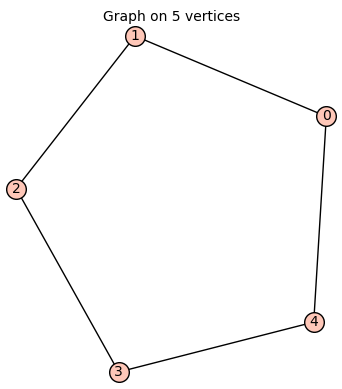

In [6]:
Graph(AC5)

In [7]:
UAC5 = transfer(AC5,np.pi); UAC5.round(3)

[  0.2 + 0.746*I 0.038 - 0.186*I 0.362 - 0.186*I 0.362 - 0.186*I 0.038 - 0.186*I]
[0.038 - 0.186*I   0.2 + 0.746*I 0.038 - 0.186*I 0.362 - 0.186*I 0.362 - 0.186*I]
[0.362 - 0.186*I 0.038 - 0.186*I   0.2 + 0.746*I 0.038 - 0.186*I 0.362 - 0.186*I]
[0.362 - 0.186*I 0.362 - 0.186*I 0.038 - 0.186*I   0.2 + 0.746*I 0.038 - 0.186*I]
[0.038 - 0.186*I 0.362 - 0.186*I 0.362 - 0.186*I 0.038 - 0.186*I   0.2 + 0.746*I]

In [8]:
# Example usage for C4
AC4 = matrix([[0, 0, 1, 1],[0, 0, 1, 1],[1, 1, 0, 0],[1, 1, 0, 0]]); AC4

[0 0 1 1]
[0 0 1 1]
[1 1 0 0]
[1 1 0 0]

In [9]:
EAC4, lAC4 = idempotents(AC4)
for i in range(len(lAC4)):
    print("Idempotent for", int(lAC4[i]))
    print(EAC4[i].round(5))

Idempotent for -2
[ 0.25  0.25 -0.25 -0.25]
[ 0.25  0.25 -0.25 -0.25]
[-0.25 -0.25  0.25  0.25]
[-0.25 -0.25  0.25  0.25]
Idempotent for 0
[ 0.5 -0.5 -0.0 -0.0]
[-0.5  0.5  0.0 -0.0]
[-0.0  0.0  0.5 -0.5]
[-0.0 -0.0 -0.5  0.5]
Idempotent for 2
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


In [10]:
################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    return U[i][j].abs()

In [11]:
# Example usage for directed C4 matrix
DC4 = np.matrix([[0,-1j,0,1j],[1j, 0, -1j, 0],[0,1j,0,-1j],[-1j,0,1j,0]]); matrix(DC4)

[   0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0]
[   0.0  1.0*I    0.0 -1.0*I]
[-1.0*I    0.0  1.0*I    0.0]

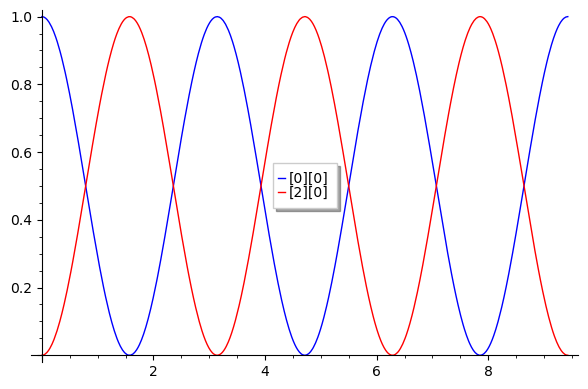

In [12]:
# Plots real part of U(t) for matrix DC4 from time 0 to 3pi at entry [0][0]
PDC400 = plot(transfer_at_time_r(DC4,x,0,0),0,3*np.pi, legend_label="[0][0]")
# Plots real part of U(t) for matrix DC4 from time 0 to 3pi at entry [2][0]
PDC420 = plot(transfer_at_time_r(DC4,x,2,0),0,3*np.pi, color="red", legend_label="[2][0]")
PDC400 + PDC420

In [13]:
# Example usage for simple Hermitian matrix
H = np.matrix([[0,1j],[-1j,0]]); matrix(H)

[   0.0  1.0*I]
[-1.0*I    0.0]

In [14]:
EH, lH = idempotents(H);
for i in range(len(lH)):
    print("Idempotent for", int(lH[i]))
    print(EH[i].round(5))

Idempotent for -1
[   0.5 -0.5*I]
[ 0.5*I    0.5]
Idempotent for 1
[   0.5  0.5*I]
[-0.5*I    0.5]


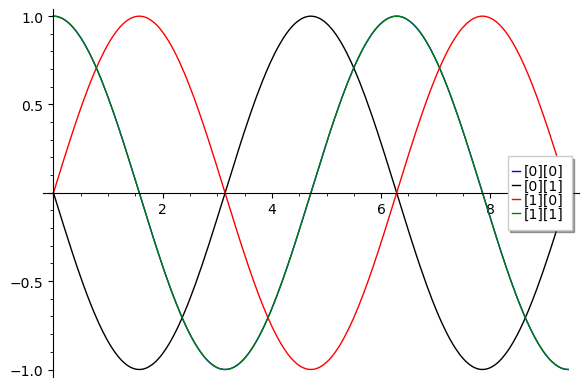

In [17]:
# Plots real part of U(t) for matrix H from time 0 to 3pi
PH00 = plot(transfer_at_time_r(H,x,0,0),0,3*np.pi, color="blue", legend_label="[0][0]")
PH01 = plot(transfer_at_time_r(H,x,0,1),0,3*np.pi, color="black", legend_label="[0][1]")
PH10 = plot(transfer_at_time_r(H,x,1,0),0,3*np.pi, color="red", legend_label="[1][0]")
PH11 = plot(transfer_at_time_r(H,x,1,1),0,3*np.pi, color="green", legend_label="[1][1]")
PH00 + PH01 + PH10 + PH11

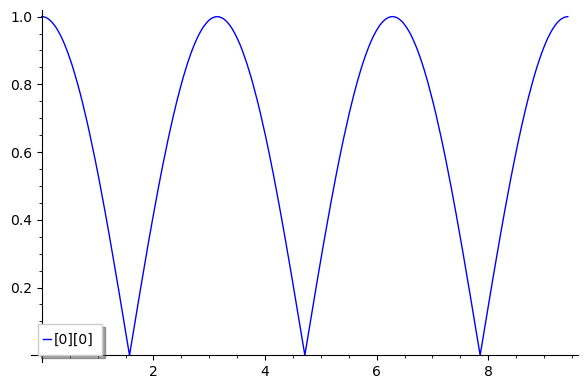

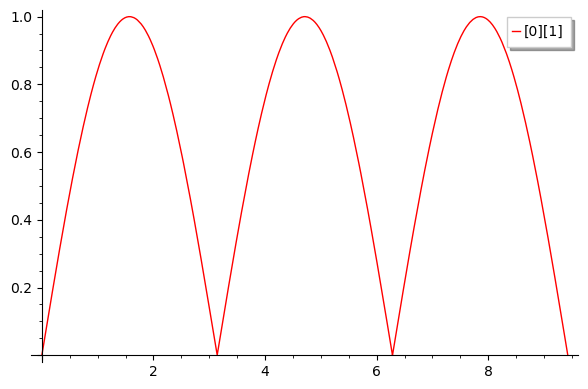

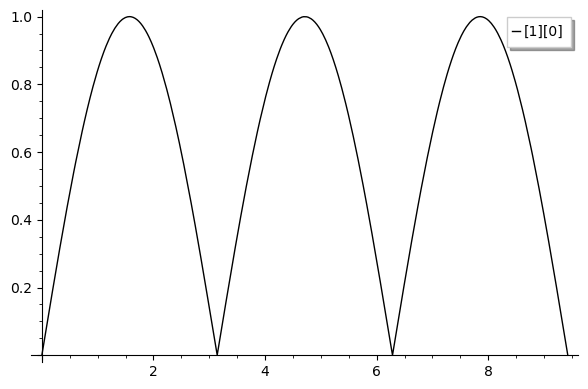

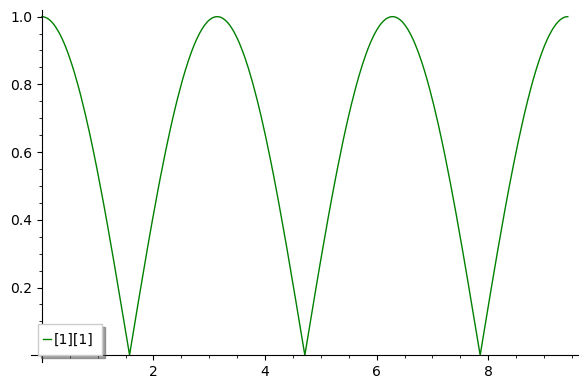

In [16]:
# Plots absolute value of U(t) for matrix H from time 0 to 3pi
PH00a = plot(transfer_at_time_a(H,x,0,0),0,3*np.pi, color="blue", legend_label="[0][0]")
PH01a = plot(transfer_at_time_a(H,x,1,0),0,3*np.pi, color="red", legend_label="[0][1]")
PH10a = plot(transfer_at_time_a(H,x,0,1),0,3*np.pi, color="black", legend_label="[1][0]")
PH11a = plot(transfer_at_time_a(H,x,1,1),0,3*np.pi, color="green", legend_label="[1][1]")
PH00a.show()
PH01a.show()
PH10a.show()
PH11a.show()